In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
df_movies = pd.read_csv('tmdb_movies.csv')
df_genres = pd.read_csv('tmdb_genres.csv')

1. Lista 10 najwyżej ocenianych filmów których liczba głosów jest większa od trzeciego kwartyla rozkładu liczby głosów.

In [2]:
Q3_value = df_movies.vote_count.quantile(0.75)
df_movies_Q3 = df_movies[df_movies['vote_count'] > Q3_value]
df_movies_Q3.sort_values(by="vote_average", ascending=False).iloc[:10]

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


2. Tabela średniego rocznego przychodu i budżetu dla filmów opublikowanych od 2010 do 2016 roku

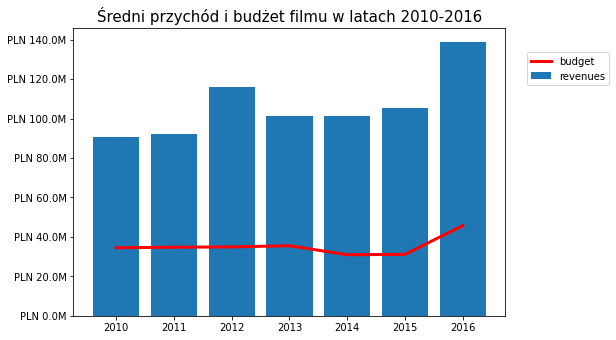

In [3]:
def million(x, pos):
        return 'PLN {:2.1f}M'.format(x*1e-6)

df_movies_10to16 = df_movies[(df_movies['release_date'] >= "2010-01-01") & (df_movies['release_date'] < "2017-01-01")]
warnings.filterwarnings('ignore')
df_movies_10to16['release_date'] = pd.to_datetime(df_movies_10to16['release_date'])
warnings.filterwarnings('default')
df_mov_bud_re=df_movies_10to16.groupby(pd.Grouper(key='release_date',freq='Y')).agg({'budget':'mean','revenue':'mean'})
budgets = df_mov_bud_re["budget"]
revenues = df_mov_bud_re["revenue"]
df_movies_seprete_index = df_mov_bud_re.reset_index()
years = df_movies_seprete_index["release_date"]
years = [2012-1-1,2013-1-1,2014-1-1,2015-1-1,2016-1-1,2017-1-1,2018-1-1]
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(years, budgets, label="budget", color='red', linewidth=3)
axes.bar(years, revenues, label='revenues')
axes.set_title("Średni przychód i budżet filmu w latach 2010-2016", size=15)
formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter)
axes.legend(loc=(1.05,0.8))

3. Baza filmów została połączona z bazą gatunków tak aby w bazie filmów dało się odczytać nazwę gatunku

In [4]:
df_genres.set_index("Unnamed: 0", inplace=True)
df_movies_joined = df_movies.join(df_genres, on="genre_id", rsuffix="r")
df_movies_joined

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


4. Najczęściej pojawiającym się gatunkiem filmu w bazie jest dramat. 1207 filmów z tego gatunku znajduje się w bazie.

In [9]:
df_movies_joined["genres"].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

5. Filmy z gatunku historycznych średnio trwają najdłużej.

In [16]:
df_movies_joined.groupby(pd.Grouper(key='genres')).agg({"runtime":"mean"}).sort_values(by="runtime", ascending=False)

,runtime
genres,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947
Crime,112.143590
TV Movie,110.500000
Action,109.058355
Science Fiction,109.031250


6. Histogram czasu trwania filmów z gatunku historycznych.

<AxesSubplot:>

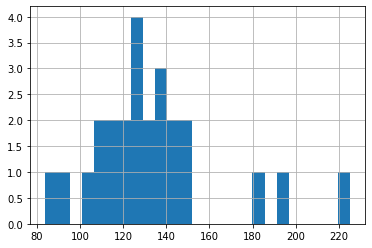

In [20]:
df_movies_history=df_movies_joined.loc[df_movies_joined["genres"]=="History"]
df_movies_history['runtime'].hist(bins=25)